# Section 40: Foundations of Natural Language Processing

## Learning Objectives

- Introduce the field of Natural Language Processing
- Learn about the extensive preprocessing involved with text data
- Walk through text classification - Finding Trump 


## Questions

### Questions from Gdoc

- In this [lab](https://github.com/learn-co-students/dsc-word-vectorization-lab-online-ds-pt-100719/tree/solution), when we talk about the “dimensions of each word”… ‘not quite sure I understand what that means. 
    - Example from the lab :
    `num_dims_wrong = len(tf_idf_all_docs)` 
        - this is just the count of documents?
	- V.S. slicing out the row? 
     `num_dims = len(tf_idf_all_docs[1])` 
         - this slices the length of the whole list??
         
         
         
- Zip up the idea of Sparse Vectors / Non-Zero vectors.  
    - In the last lab: 
    >“The average vectorized article contains 107 non-zero columns. This means that 99.7% of each vector is actually zeroes! This is one reason why it's best not to create your own vectorizers, and rely on professional packages such as scikit-learn and NLTK instead -- they contain many speed and memory optimizations specifically for dealing with sparse vectors. This way, we aren't wasting a giant chunk of memory on a vectorized dataset that only has valid information in 0.3% of it.”
    - However we use this data for modeling regardless?

### Additional Questions?


# Natural Language Processing

> **_Natural Language Processing_**, or **_NLP_**, is the study of how computers can interact with humans through the use of human language.  Although this is a field that is quite important to Data Scientists, it does not belong to Data Science alone.  NLP has been around for quite a while, and sits at the intersection of *Computer Science*, *Artificial Intelligence*, *Linguistics*, and *Information Theory*. 

## Where is NLP Used?
- Reviews (i.e. Amazon)
- Stock market trading
- AI Assistants
- Spam Detection

- **Demonstration:**
    - [Google Duplex AI Assistant](https://youtu.be/D5VN56jQMWM)

# Working with Text Data

## Preprocessing

**Preparing text data requires more processing than normal data.**
1. We must remove things like:
    - punctuation
    - numbers
    - upper vs lowercase letters
    
    
2. It is always recommended that go a step beyond this and remove **commonly used words that contain little information (called "stopwords")** for our machine learning algorithms. Words like: the,was,he,she, it,etc.


3. Additionally, most analyses **need the text tokenzied** into a list of words and not in a natural sentence format. Instead, they are a list of words (**tokens**) separated by "`,`", which tells the algorithm what should be considered one word.


4. While not always required, it is often a good idea to reduce similar words down to a shared core.
There are often **multiple variants of the same word with the same/simiar meaning**,<br> but one may plural **(i.e. "democrat" and "democrats")**, or form of words is different **(i.e. run, running).**<br> Simplifying words down to the basic core word (or word *stem*) is referred to as **"stemming"**. <br><br> A more advanced form of this also understands things like words that are just in a **different tense** such as  i.e.  **"ran", "run", "running"**. This process is called  **"lemmatization**, where the words are reduced to their simplest form, called "**lemmas**"<br>  
    - Stemming<br><img src="https://raw.githubusercontent.com/learn-co-students/dsc-nlp-and-word-vectorization-online-ds-ft-100719/master/images/new_stemming.png" width=40%>
    - Lemmatization
    
|   Word   |  Stem | Lemma |
|:--------:|:-----:|:-----:|
|  Studies | Studi | Study |
| Studying | Study | Study |

5. Finally, we have to convert our text data into numeric form for our machine learning models to analyze, a process called **vectorization**.

## Vectorization

- For computers to process text it needs to be converted to a numerical representation of the text.

- There are several different ways we can vectorize our text:

    - Count vectorization
    - Term Frequency-Inverse Document Frequency (TF-IDF)
        -  Used for multiple texts
    
    
>- **_Term Frequency_** is calculated with the following formula:
$$ \text{Term Frequency}(t) = \frac{\text{number of times it appears in a document}} {\text{total number of terms in the document}} $$ 

> - **_Inverse Document Frequency_** is calculated with the following formula:
$$ IDF(t) = log_e(\frac{\text{Total Number of Documents}}{\text{Number of Documents with it in it}})$$

> The **_TF-IDF_** value for a given word in a given document is just found by multiplying the two!

- There are additional ways to vectorize using Deep Neural Networks to create Word Embeddings (see Module 4 > Appendix: Deep NLP)

# Practicing Text Preprocessing with Trump's Tweets

## Feature Engineering for Text Data


* Do we remove stop words or not?    
* Do we stem or lemmatize our text data, or leave the words as is?   
* Is basic tokenization enough, or do we need to support special edge cases through the use of regex?  
* Do we use the entire vocabulary, or just limit the model to a subset of the most frequently used words? If so, how many?  
* Do we engineer other features, such as bigrams, or POS tags, or Mutual Information Scores?   
* What sort of vectorization should we use in our model? Boolean Vectorization? Count Vectorization? TF-IDF? More advanced vectorization strategies such as Word2Vec?  


In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.22 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
finding_trump = 'https://raw.githubusercontent.com/jirvingphd/online-ds-pt-1007109-text-classification-finding-trump/master/finding-trump.csv'
df = pd.read_csv(finding_trump)#'https://raw.githubusercontent.com/jirvingphd/capstone-project-using-trumps-tweets-to-predict-stock-market/master/data/trump_tweets_12012016_to_01012020.csv')
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter Media Studio,https://t.co/EVAEYD1AgV,01-01-2020 03:12:07,25016,108830,False,1212209862094012416
1,Twitter for iPhone,HAPPY NEW YEAR!,01-01-2020 01:30:35,85409,576045,False,1212184310389850119
2,Twitter for iPhone,Our fantastic First Lady! https://t.co/6iswto4WDI,01-01-2020 01:22:28,27567,132633,False,1212182267113680896
3,Twitter for iPhone,RT @DanScavino: https://t.co/CJRPySkF1Z,01-01-2020 01:18:47,10796,0,True,1212181341078458369
4,Twitter for iPhone,RT @SenJohnKennedy: I think Speaker Pelosi is ...,01-01-2020 01:17:43,8893,0,True,1212181071988703232


In [3]:
## Create a variable "corpus" containing all text
corpus = df['text'].to_list()
corpus[:10]

['https://t.co/EVAEYD1AgV',
 'HAPPY NEW YEAR!',
 'Our fantastic First Lady! https://t.co/6iswto4WDI',
 'RT @DanScavino: https://t.co/CJRPySkF1Z',
 'RT @SenJohnKennedy: I think Speaker Pelosi is having 2nd thoughts about impeaching the President. The Senate should get back to work on USM…',
 'Thank you Steve. The greatest Witch Hunt in U.S. history! https://t.co/I3bSNVp6gC',
 'RT @ThisWeekABC: Sen. Ron Johnson says charges against Pres. Trump are "pretty thin gruel" and Speaker Nancy Pelosi\'s decision to withhold…',
 "RT @SenJohnKennedy: The Senate needs to reauthorize the Violence Against Women Act and I am proud to cosponsor @SenJoniErnst's bill that g…",
 'RT @LindseyGrahamSC: To our Iraqi allies:This is your moment to convince the American people the US-Iraq relationship is meaningful to yo…',
 'RT @LindseyGrahamSC: President Trump unlike President Obama will hold you accountable for threats against Americans and hit you where it…']

### Make a Bag-of-Words Frequency Distribution 

- "bag-of-words": collection of all words from a corpus and their frequencies


In [4]:
from nltk import FreqDist
corpus[0]

'https://t.co/EVAEYD1AgV'

In [5]:
## Make a FreqDist from the corpus
freq= FreqDist(','.join(corpus))

## Display 100 most common words
freq.most_common(100)

[(' ', 355279),
 ('e', 193636),
 ('t', 151004),
 ('a', 133814),
 ('o', 132306),
 ('n', 115782),
 ('i', 111789),
 ('r', 107277),
 ('s', 97228),
 ('h', 76548),
 ('l', 67415),
 ('d', 57543),
 ('u', 46550),
 ('c', 45746),
 ('m', 43554),
 ('p', 37247),
 ('g', 35477),
 ('y', 33375),
 ('.', 32244),
 ('w', 30005),
 ('f', 29211),
 ('b', 22246),
 ('T', 19911),
 ('v', 17186),
 (',', 14545),
 ('k', 13783),
 ('/', 13588),
 ('S', 12999),
 ('A', 12922),
 ('R', 12294),
 ('C', 10866),
 ('I', 10743),
 (':', 9821),
 ('N', 9009),
 ('!', 8861),
 ('D', 8787),
 ('@', 8646),
 ('M', 8063),
 ('E', 8008),
 ('P', 7726),
 ('W', 7249),
 ('O', 6828),
 ('H', 6614),
 ('B', 6115),
 ('G', 5937),
 ('F', 5701),
 ('L', 4774),
 ('U', 4765),
 ('0', 4659),
 ('x', 4068),
 ('J', 4060),
 ('’', 3445),
 ('1', 3191),
 ('j', 3084),
 ('…', 2956),
 ('2', 2812),
 ('-', 2672),
 ('K', 2622),
 ('V', 2460),
 ('Y', 2194),
 (';', 2105),
 ('z', 2082),
 ('&', 2079),
 ('“', 1993),
 ('”', 1890),
 ('5', 1848),
 ('#', 1785),
 ('3', 1730),
 ('4', 1

> That's not quite right...

In [6]:
## Tokenize corpus then generate FreqDist
from nltk import word_tokenize
tokens = word_tokenize(','.join(corpus))
freq=FreqDist(tokens)
freq.most_common(100)

[('the', 15560),
 (',', 14160),
 ('.', 13708),
 (':', 9462),
 ('to', 9308),
 ('!', 8861),
 ('@', 8646),
 ('and', 8497),
 ('of', 7176),
 ('a', 5658),
 ('is', 5096),
 ('in', 4996),
 ('https', 4265),
 ('for', 4081),
 ('RT', 3819),
 ('’', 3445),
 ('on', 3150),
 ('I', 3132),
 ('that', 3031),
 ('are', 2825),
 ('with', 2650),
 ('...', 2620),
 ('be', 2501),
 ('will', 2486),
 ('our', 2418),
 ('The', 2367),
 ('have', 2116),
 (';', 2105),
 ('&', 2079),
 ('amp', 2070),
 ('“', 1993),
 ('it', 1932),
 ('”', 1890),
 ('you', 1834),
 ('was', 1789),
 ('#', 1785),
 ('at', 1621),
 ('has', 1600),
 ('they', 1553),
 ('s', 1517),
 ('great', 1501),
 ('President', 1492),
 ('not', 1415),
 ('we', 1389),
 ('by', 1375),
 ('this', 1336),
 ('all', 1304),
 ('t', 1289),
 ('(', 1181),
 (')', 1174),
 ('Trump', 1154),
 ('Democrats', 1145),
 ('people', 1124),
 ('very', 1084),
 ('-', 1079),
 ('We', 1072),
 ('who', 1040),
 ('?', 1007),
 ('realDonaldTrump', 996),
 ('from', 979),
 ('my', 966),
 ('as', 956),
 ('he', 943),
 ('the

> Better...but what's our next issue?

In [7]:
## Make a list of stopwords to remove
from nltk.corpus import stopwords
import string

In [8]:
additional_punc = ['“','”','...']

In [9]:
# Get all the stop words in the English language
stopwords_list = stopwords.words('english')

## Add punctuation to stopwords_list
stopwords_list+=string.punctuation
print(stopwords_list)

stopwords_list.extend(additional_punc)#['“','”'])#'...'

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
## Commentary on not always accepting what is or isn't in stopwords
print('until' in stopwords_list)

stopwords_list.remove('until')
print('until' in stopwords_list)

True
False


In [11]:
## Remove stopwords and then re-product the FreqDist
stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list]
freq = FreqDist(stopped_tokens)
freq.most_common(100)

[('https', 4265),
 ('rt', 3819),
 ('’', 3445),
 ('great', 2552),
 ('amp', 2070),
 ('president', 1605),
 ('people', 1309),
 ('trump', 1193),
 ('democrats', 1166),
 ('realdonaldtrump', 1045),
 ('country', 947),
 ('news', 931),
 ('thank', 929),
 ('big', 832),
 ('fake', 802),
 ('new', 791),
 ('many', 749),
 ('today', 747),
 ('get', 741),
 ('would', 714),
 ('border', 711),
 ('america', 699),
 ('never', 676),
 ('time', 666),
 ('u.s.', 625),
 ('american', 611),
 ('much', 594),
 ('want', 591),
 ('one', 588),
 ('years', 587),
 ('media', 582),
 ('good', 567),
 ('united', 543),
 ('even', 525),
 ('house', 523),
 ('states', 509),
 ('back', 492),
 ('``', 491),
 ('done', 485),
 ("'s", 479),
 ('must', 478),
 ('make', 478),
 ('china', 474),
 ('like', 465),
 ('going', 460),
 ('vote', 458),
 ('nothing', 455),
 ('dems', 452),
 ('job', 440),
 ('impeachment', 435),
 ('jobs', 431),
 ('state', 413),
 ('day', 407),
 ('first', 406),
 ('us', 404),
 ('bad', 402),
 ('whitehouse', 398),
 ('made', 391),
 ('military'

In [12]:
## Sometimes we need to add more punctuation ourselves
add_punc= ["''",'’','``']
stopwords_list.extend(add_punc)

In [13]:
## Let's try that one last time
stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list]
freq = FreqDist(stopped_tokens)
freq.most_common(100)

[('https', 4265),
 ('rt', 3819),
 ('great', 2552),
 ('amp', 2070),
 ('president', 1605),
 ('people', 1309),
 ('trump', 1193),
 ('democrats', 1166),
 ('realdonaldtrump', 1045),
 ('country', 947),
 ('news', 931),
 ('thank', 929),
 ('big', 832),
 ('fake', 802),
 ('new', 791),
 ('many', 749),
 ('today', 747),
 ('get', 741),
 ('would', 714),
 ('border', 711),
 ('america', 699),
 ('never', 676),
 ('time', 666),
 ('u.s.', 625),
 ('american', 611),
 ('much', 594),
 ('want', 591),
 ('one', 588),
 ('years', 587),
 ('media', 582),
 ('good', 567),
 ('united', 543),
 ('even', 525),
 ('house', 523),
 ('states', 509),
 ('back', 492),
 ('done', 485),
 ("'s", 479),
 ('must', 478),
 ('make', 478),
 ('china', 474),
 ('like', 465),
 ('going', 460),
 ('vote', 458),
 ('nothing', 455),
 ('dems', 452),
 ('job', 440),
 ('impeachment', 435),
 ('jobs', 431),
 ('state', 413),
 ('day', 407),
 ('first', 406),
 ('us', 404),
 ('bad', 402),
 ('whitehouse', 398),
 ('made', 391),
 ('military', 386),
 ('deal', 386),
 ('e

### Additional Ways to Show Frequency

- [Word Clouds](https://www.geeksforgeeks.org/generating-word-cloud-python/)

(-0.5, 399.5, 199.5, -0.5)

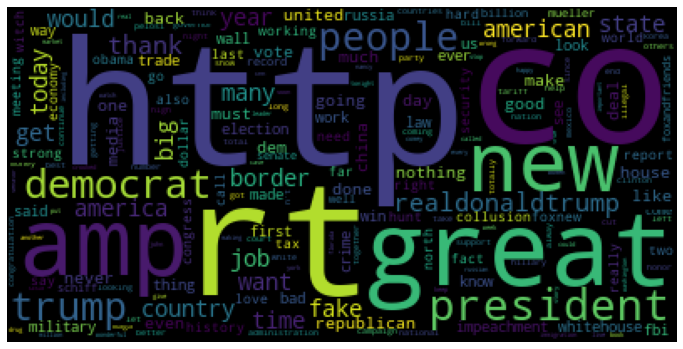

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stopwords_list,collocations=False)
wordcloud.generate(','.join(stopped_tokens))
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off')

### Comparing Phases of Proprocessing/Tokenization

In [15]:
from nltk import word_tokenize
from ipywidgets import interact

@interact
def tokenize_tweet(i=(0,len(corpus)-1)):
    from nltk.corpus import stopwords
    import string
    from nltk import word_tokenize,regexp_tokenize
    
    print(f"- Tweet #{i}:\n")
    print(corpus[i],'\n')
    tokens = word_tokenize(corpus[i])

    # Get all the stop words in the English language
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    stopped_tokens = [w.lower() for w in tokens if w not in stopwords_list]
    
    print(tokens,end='\n\n')
    print(stopped_tokens)

interactive(children=(IntSlider(value=7032, description='i', max=14065), Output()), _dom_classes=('widget-inte…

> What recognizable pattern of characters is high on the frequency list?

## Other Bag of Words Statistics

### Bigrams

In [16]:
import nltk
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)

tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)
pd.DataFrame.from_records(tweets_scored,columns=['Words','Frequency']).head(20)

,Words,Frequency
0,"(fake, news)",0.002831
1,"(united, states)",0.001992
2,"(rt, realdonaldtrump)",0.001878
3,"(witch, hunt)",0.001488
4,"(president, trump)",0.001397
5,"(rt, whitehouse)",0.001143
6,"(america, great)",0.001021
7,"(white, house)",0.000998
8,"(news, media)",0.000930
9,"(president, realdonaldtrump)",0.000894


### Mutual Information Scores

In [17]:
import nltk
bigram_measures = nltk.collocations.BigramAssocMeasures()

tweet_pmi_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweet_pmi_finder.apply_freq_filter(5)

tweet_pmi_scored = tweet_pmi_finder.score_ngrams(bigram_measures.pmi)
pd.DataFrame.from_records(tweet_pmi_scored,columns=['Words','PMI']).head(20)

,Words,PMI
0,"(da, nang)",15.427994
1,"(idlib, province)",15.427994
2,"(madame, peng)",15.427994
3,"(peng, liyuan)",15.427994
4,"(catherine, herridge)",15.164959
5,"(sri, lanka)",15.164959
6,"(fred, keller)",14.942567
7,"(hong, kong)",14.942567
8,"(jonathan, turley)",14.942567
9,"(jimhagedornmn, petestauber)",14.749922


# Regular Expressions

- Regular expressions can help us capture/remove complicated patterns in our text.
- Best regexp resource and tester: https://regex101.com/

    - Make sure to check "Python" under Flavor menu on left side.
    
    
- Let's use regular expressions to remove URLs

In [18]:
## Select an example tweet
text =  corpus[6615]
text

'I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8'

In [19]:
## Select a second example tweet
text2=corpus[7347]
text2

'RT @real_defender: @realDonaldTrump Protecting America and putting Americans first. Thank you Mr. President!'

In [20]:
## From tjhe lessons
from nltk import regexp_tokenize
pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
regexp_tokenize(text,pattern)

['I',
 'will',
 'be',
 'in',
 'Green',
 'Bay',
 'Wisconsin',
 'on',
 'Saturday',
 'April',
 'th',
 'at',
 'the',
 'Resch',
 'Center',
 'pm',
 'CDT',
 'Big',
 'crowd',
 'expected',
 'MAGA',
 'https',
 't',
 'co',
 'BPYK',
 'PF',
 'O']

### Let's use regex to find/remove URLS

- www.regex101.com
    - Copy and paste example text to search
    - Test out regular expressions and see what they pick up

In [21]:
print(text,text2)

I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8 RT @real_defender: @realDonaldTrump Protecting America and putting Americans first. Thank you Mr. President!


In [22]:
import re
re.findall(r"(https://\w*\.\w*/+\w+)",text)

['https://t.co/BPYK8PF0O8']

In [23]:
def clean_text(text,regex=True):
    from nltk.corpus import stopwords
    import string
    from nltk import word_tokenize,regexp_tokenize

    ## tokenize text
    if regex:
        pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
        tokens= regexp_tokenize(text,pattern)
    else:
        tokens = word_tokenize(text)
        
    # Get all the stop words in the English language
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    
    stopped_tokens = [w.lower() for w in tokens if w not in stopwords_list]
    
    return stopped_tokens

In [24]:
## Other uses of RegEx for Tweet preprocessing
import re

def find_urls(string): 
    return re.findall(r"(http[s]?://\w*\.\w*/+\w+)",string)

def find_hashtags(string):
    return re.findall(r'\#\w*',string)

def find_retweets(string):
    return re.findall(r'RT [@]?\w*:',string)

def find_mentions(string):
    return re.findall(r'\@\w*',string)

In [25]:
find_urls(text)

['https://t.co/BPYK8PF0O8']

In [26]:
find_mentions(text2)

['@real_defender', '@realDonaldTrump']

## Stemming/Lemmatization

In [27]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('feet')) # foot
print(lemmatizer.lemmatize('running')) # run [?!] Does not match expected output

foot
running


In [28]:
text_in =  corpus[6615]

def process_tweet(text,as_lemmas=False,as_tokens=True):
#     text=text.copy()
    for x in find_urls(text):
        text = text.replace(x,'')
        
    for x in find_retweets(text):
        text = text.replace(x,'')    
        
    for x in find_hashtags(text):
        text = text.replace(x,'')    

    if as_lemmas:
        from nltk.stem.wordnet import WordNetLemmatizer
        lemmatizer = WordNetLemmatizer()
        text = lemmatizer.lemmatize(text)
    
    if as_tokens:
        text = clean_text(text)
    
    if len(text)==0:
        text=''
            
    return text

In [29]:
@interact
def show_processed_text(i=(0,len(corpus)-1)):
    text_in = corpus[i]#.copy()
    print(text_in)
    text_out = process_tweet(text_in)
    print(text_out)
    text_out2 = process_tweet(text_in,as_lemmas=True)
    print(text_out2)

interactive(children=(IntSlider(value=7032, description='i', max=14065), Output()), _dom_classes=('widget-inte…

In [30]:
corpus[:6]

['https://t.co/EVAEYD1AgV',
 'HAPPY NEW YEAR!',
 'Our fantastic First Lady! https://t.co/6iswto4WDI',
 'RT @DanScavino: https://t.co/CJRPySkF1Z',
 'RT @SenJohnKennedy: I think Speaker Pelosi is having 2nd thoughts about impeaching the President. The Senate should get back to work on USM…',
 'Thank you Steve. The greatest Witch Hunt in U.S. history! https://t.co/I3bSNVp6gC']

# Text Classification - Finding Trump

## Finding Trump with Sklearn

In [31]:
finding_trump = 'https://raw.githubusercontent.com/jirvingphd/online-ds-pt-1007109-text-classification-finding-trump/master/finding-trump.csv'

In [32]:
df = pd.read_csv(finding_trump,#'https://raw.githubusercontent.com/jirvingphd/capstone-project-using-trumps-tweets-to-predict-stock-market/master/data/trump_tweets_12012016_to_01012020.csv',
                index_col='created_at',parse_dates=['created_at'])
df.head()

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2020-01-01 03:12:07,Twitter Media Studio,https://t.co/EVAEYD1AgV,25016,108830,False,1212209862094012416
2020-01-01 01:30:35,Twitter for iPhone,HAPPY NEW YEAR!,85409,576045,False,1212184310389850119
2020-01-01 01:22:28,Twitter for iPhone,Our fantastic First Lady! https://t.co/6iswto4WDI,27567,132633,False,1212182267113680896
2020-01-01 01:18:47,Twitter for iPhone,RT @DanScavino: https://t.co/CJRPySkF1Z,10796,0,True,1212181341078458369
2020-01-01 01:17:43,Twitter for iPhone,RT @SenJohnKennedy: I think Speaker Pelosi is ...,8893,0,True,1212181071988703232


In [33]:
## Get time period where Trump still had his personal Android
start_ts = df[ df['source'] == 'Twitter for Android'].index[0]
end_ts = df[ df['source'] == 'Twitter for Android'].index[-1]
df = df.loc[start_ts:end_ts]
df

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2017-03-25 14:41:14,Twitter for Android,Watch @JudgeJeanine on @FoxNews tonight at 9:0...,10116,51247,False,845646761704243200
2017-03-25 14:37:52,Twitter for Android,ObamaCare will explode and we will all get tog...,22518,104321,False,845645916732358656
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968
...,...,...,...,...,...,...
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,38805,122905,False,804863098138005504
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656


In [34]:
df['source'].value_counts()

Twitter for Android    364
Twitter for iPhone     239
Twitter Web Client      14
Name: source, dtype: int64

In [35]:
df[df['source'].str.contains('Web')]

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2017-01-26 00:03:33,Twitter Web Client,Beginning today the United States of America g...,23095,109885,False,824407390674157568
2017-01-18 22:21:02,Twitter Web Client,Looking forward to a speedy recovery for Georg...,21141,135864,False,821844875268255744
2017-01-17 19:58:10,Twitter Web Client,RT @EricTrump: Thank you to @GolfDigest for th...,9066,0,True,821446536278274050
2017-01-17 19:36:21,Twitter Web Client,RT @MoskowitzEva: .@BetsyDeVos has the talent ...,6856,0,True,821441044097224704
2017-01-17 17:55:38,Twitter Web Client,Thank you to General Motors and Walmart for st...,21503,103996,False,821415698278875137
2017-01-17 17:36:45,Twitter Web Client,How Trump Won--And How The Media Missed It htt...,11434,42827,False,821410947864653825
2017-01-13 17:42:42,Twitter Web Client,A beautiful funeral today for a real NYC hero ...,21197,109424,False,819962894616064001
2017-01-06 19:30:09,Twitter Web Client,Monitoring the terrible situation in Florida. ...,22189,96091,False,817453219613917185
2017-01-04 18:52:09,Twitter Web Client,Jackie Evancho's album sales have skyrocketed ...,17093,79498,False,816718880731234304


In [36]:
df = df[~df['source'].str.contains('Web')]
df

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2017-03-25 14:41:14,Twitter for Android,Watch @JudgeJeanine on @FoxNews tonight at 9:0...,10116,51247,False,845646761704243200
2017-03-25 14:37:52,Twitter for Android,ObamaCare will explode and we will all get tog...,22518,104321,False,845645916732358656
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968
...,...,...,...,...,...,...
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,38805,122905,False,804863098138005504
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656


In [37]:
df['source'].value_counts(normalize=True)

Twitter for Android    0.603648
Twitter for iPhone     0.396352
Name: source, dtype: float64

In [38]:
df['trump_tweet'] = (df['source'] == 'Twitter for Android').astype(int)
df['trump_tweet'].value_counts(normalize=True)

1    0.603648
0    0.396352
Name: trump_tweet, dtype: float64

In [39]:
y = df['trump_tweet']
y.value_counts()

1    364
0    239
Name: trump_tweet, dtype: int64

In [40]:
X = df['text']#.apply(tokenizer.tokenize)
X.head()

created_at
2017-03-25 14:41:14    Watch @JudgeJeanine on @FoxNews tonight at 9:0...
2017-03-25 14:37:52    ObamaCare will explode and we will all get tog...
2017-03-25 13:29:17    Happy #MedalOfHonorDay to our heroes! ➡️https:...
2017-03-24 17:59:42    Today I was thrilled to announce a commitment ...
2017-03-24 17:03:46    Today I was pleased to announce the official a...
Name: text, dtype: object

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [42]:
y_train.value_counts(normalize=True)

1    0.604265
0    0.395735
Name: trump_tweet, dtype: float64

In [43]:
y_test.value_counts(normalize=True)

1    0.60221
0    0.39779
Name: trump_tweet, dtype: float64

In [44]:
X_train

created_at
2017-03-13 20:57:02    Proud to welcome our great Cabinet this aftern...
2017-02-07 02:33:55    The failing @nytimes was forced to apologize t...
2017-01-19 20:21:36    Join me at 4pm over at the Lincoln Memorial wi...
2017-01-29 13:00:32    Somebody with aptitude and conviction should b...
2016-12-14 00:52:40    RT @DanScavino: Join #PEOTUS Trump &amp; #VPEO...
                                             ...                        
2016-12-30 19:46:55    Join @AmerIcan32 founded by Hall of Fame legen...
2017-02-09 13:26:07    Sen. McCain should not be talking about the su...
2017-01-25 22:05:59    I will be interviewed by @DavidMuir tonight at...
2017-01-31 11:21:52    Nancy Pelosi and Fake Tears Chuck Schumer held...
2017-01-25 12:13:46    even those registered to vote who are dead (an...
Name: text, Length: 422, dtype: object

### Tokenization & Vectorization 

In [45]:
import nltk
tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False,)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize,stop_words=stopwords_list)
# vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize,stop_words=stopwords_list)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf

<422x2147 sparse matrix of type '<class 'numpy.float64'>'
	with 4812 stored elements in Compressed Sparse Row format>

In [47]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_tfidf,y_train)

RandomForestClassifier(class_weight='balanced')

In [48]:
y_hat_test = rf.predict(X_test_tfidf)
y_hat_train = rf.predict(X_train_tfidf)

In [49]:
from sklearn import metrics
import matplotlib.pyplot as plt
# my_scorer = metrics.make_scorer(evaluate_model,)

def evaluate_model(y_test,y_hat_test,X_test,clf=None,
                  scoring=metrics.recall_score,verbose=False,
                  scorer=False):

    print(metrics.classification_report(y_test,y_hat_test))
    metrics.plot_confusion_matrix(clf,X_test,y_test,normalize='true',
                                 cmap='Blues')
    plt.show()
    if verbose:
        print("MODEL PARAMETERS:")
        print(pd.Series(rf.get_params()))
        
    if scorer:
        
        return scoring(y_test,y_hat_test)
    
    

In [50]:
pd.Series(rf.get_params())

bootstrap                       True
ccp_alpha                          0
class_weight                balanced
criterion                       gini
max_depth                       None
max_features                    auto
max_leaf_nodes                  None
max_samples                     None
min_impurity_decrease              0
min_impurity_split              None
min_samples_leaf                   1
min_samples_split                  2
min_weight_fraction_leaf           0
n_estimators                     100
n_jobs                          None
oob_score                      False
random_state                    None
verbose                            0
warm_start                     False
dtype: object

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       255

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422



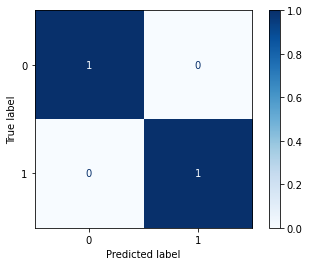

In [51]:
evaluate_model(y_train,y_hat_train,X_train_tfidf,rf)

              precision    recall  f1-score   support

           0       0.82      0.65      0.73        72
           1       0.80      0.91      0.85       109

    accuracy                           0.81       181
   macro avg       0.81      0.78      0.79       181
weighted avg       0.81      0.81      0.80       181



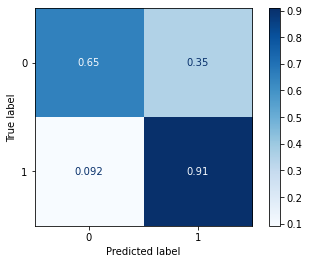

In [52]:
evaluate_model(y_test,y_hat_test,X_test_tfidf,rf)

In [53]:
# help(rf.estimators_[0].get_depth)

In [54]:
rf.estimators_[0].get_depth()

83

### Get feature importances as text

In [55]:
X_train_tfidf.shape

(422, 2147)

In [56]:
len(vectorizer.vocabulary_)

2147

In [57]:
vectorizer.get_feature_names()[:10]

['#1in',
 '#ahca',
 '#americafirst',
 '#draintheswam',
 '#dts',
 '#facebook',
 '#fakenews',
 '#family',
 '#familytime',
 '#godblesstheusa']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127482 missing from current font.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127480 missing from current font.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 127482 missing from current font.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 127480 missing from current font.



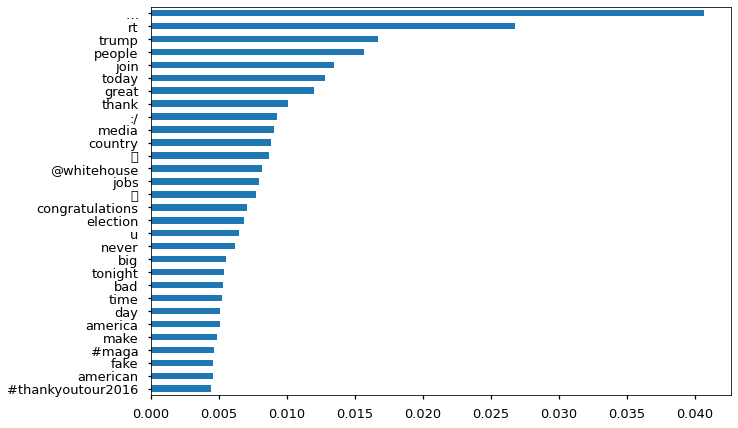

In [58]:
# vectorizer.get_feature_names()
with plt.style.context('seaborn-talk'):
    importance = pd.Series(rf.feature_importances_,index= vectorizer.get_feature_names())
    importance.sort_values(inplace=True)

    importance.sort_values().tail(30).plot(kind='barh')

In [59]:
df[df['text'].str.contains('...',regex=False)]['source'].value_counts(normalize=True)

Twitter for Android    0.865672
Twitter for iPhone     0.134328
Name: source, dtype: float64

In [60]:
top_word_probs = {}
for word in importance.tail(20).index:
    rows = df['text'].str.contains(word,regex=False,case=False)
    val_count= df[rows]['source'].value_counts(normalize=True)
    top_word_probs[word] = val_count
#     print(f'\n\n{word}:\n{val_count}')

In [61]:
# top_word_probs

In [62]:
top_probs = pd.DataFrame(top_word_probs).T
top_probs.style.background_gradient(axis=1)

,Twitter for Android,Twitter for iPhone
big,0.820513,0.179487
never,0.809524,0.190476
u,0.602170,0.397830
election,0.870968,0.129032
congratulations,0.333333,0.666667
🇺,nan,1.000000
jobs,0.468750,0.531250
@whitehouse,nan,1.000000
🇸,nan,1.000000
country,0.862069,0.137931


In [63]:
top_probs.columns

Index(['Twitter for Android', 'Twitter for iPhone'], dtype='object')

In [64]:
top_probs.index

Index(['big', 'never', 'u', 'election', 'congratulations', '🇺', 'jobs',
       '@whitehouse', '🇸', 'country', 'media', ':/', 'thank', 'great', 'today',
       'join', 'people', 'trump', 'rt', '…'],
      dtype='object')

In [65]:
# vectorizer.inverse_transform(vectorizer.idf_)

## Other Classifiers - Naive Bayes

              precision    recall  f1-score   support

           0       0.96      0.62      0.76        72
           1       0.80      0.98      0.88       109

    accuracy                           0.84       181
   macro avg       0.88      0.80      0.82       181
weighted avg       0.86      0.84      0.83       181



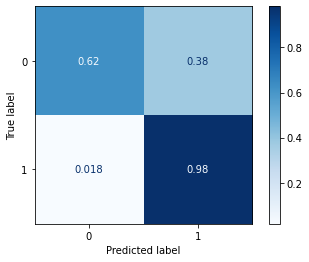

In [66]:
nb_classifier = MultinomialNB()#alpha = 1.0e-08)
nb_classifier.fit(X_train_tfidf,y_train)
y_hat_test = nb_classifier.predict(X_test_tfidf)
evaluate_model(y_test,y_hat_test,X_test_tfidf,nb_classifier)

In [67]:
# nb_classifier.class_count_

## GridSearch Random Forest

In [68]:
from sklearn.model_selection import GridSearchCV
params  = {'criterion':['gini','entropy'],
           'max_depth':[3,5,10,50,100,None],
          'class_weight':['balanced',None],
           'bootstrap':[True ,False],
          'min_samples_leaf':[1,2,3,4],
          }
rf_clf = RandomForestClassifier()
grid = GridSearchCV(rf_clf,params,return_train_score=False,
                    scoring='recall_weighted',n_jobs=-1)
grid.fit(X_train_tfidf,y_train)
print(grid.best_score_)
grid.best_params_

0.800812324929972


{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2}

In [69]:
best_rf = grid.best_estimator_
best_rf.fit(X_train_tfidf, y_train)

y_hat_test = best_rf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.68      0.75      0.72        72
           1       0.82      0.77      0.80       109

    accuracy                           0.76       181
   macro avg       0.75      0.76      0.76       181
weighted avg       0.77      0.76      0.76       181



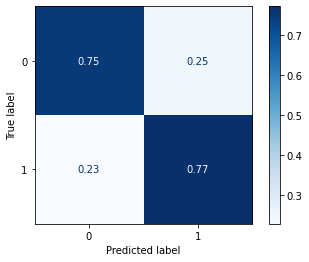

In [70]:
evaluate_model(y_test,y_hat_test,X_test_tfidf,best_rf)

<AxesSubplot:>

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127480 missing from current font.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127482 missing from current font.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 127480 missing from current font.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 127482 missing from current font.



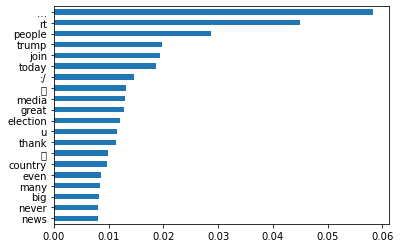

In [71]:
importance = pd.Series(best_rf.feature_importances_,index= vectorizer.get_feature_names())
importance.sort_values().tail(20).plot(kind='barh')

# APPENDIX

### Summary table from Finding Trump

In [72]:
## Summary Table with Most Frequent Words 
prob_cols =['Twitter for Android','Twitter for iPhone']
top_probs['importance'] = importance.loc[top_probs.index]

top_probs['max_prob'] = top_probs[prob_cols].max(axis=1)
top_probs['Max Prob Class'] = top_probs[prob_cols].idxmax(axis=1)
top_probs.sort_values('importance',0,0,inplace=True)
top_probs.style.bar('importance')\
                    .background_gradient(subset=['max_prob'])\
                    .highlight_max(subset=prob_cols,axis=1,color='lightgreen')
#.background_gradient(subset=prob_cols,axis=1,cmap='Reds')

,Twitter for Android,Twitter for iPhone,importance,max_prob,Max Prob Class
…,0.015873,0.984127,0.058263,0.984127,Twitter for iPhone
rt,0.527559,0.472441,0.044988,0.527559,Twitter for Android
people,0.880000,0.120000,0.028671,0.880000,Twitter for Android
trump,0.303571,0.696429,0.019661,0.696429,Twitter for iPhone
join,0.035714,0.964286,0.019366,0.964286,Twitter for iPhone
today,0.421053,0.578947,0.018652,0.578947,Twitter for iPhone
:/,0.023952,0.976048,0.014630,0.976048,Twitter for iPhone
🇺,nan,1.000000,0.013179,1.000000,Twitter for iPhone
media,0.885714,0.114286,0.012936,0.885714,Twitter for Android
great,0.572917,0.427083,0.012773,0.572917,Twitter for Android


In [73]:
results = top_probs[['Max Prob Class','max_prob','importance']]
display(results.style.bar('importance').background_gradient(subset=['max_prob']))
results['Max Prob Class'].value_counts(1)


,Max Prob Class,max_prob,importance
…,Twitter for iPhone,0.984127,0.058263
rt,Twitter for Android,0.527559,0.044988
people,Twitter for Android,0.880000,0.028671
trump,Twitter for iPhone,0.696429,0.019661
join,Twitter for iPhone,0.964286,0.019366
today,Twitter for iPhone,0.578947,0.018652
:/,Twitter for iPhone,0.976048,0.014630
🇺,Twitter for iPhone,1.000000,0.013179
media,Twitter for Android,0.885714,0.012936
great,Twitter for Android,0.572917,0.012773


Twitter for iPhone     0.55
Twitter for Android    0.45
Name: Max Prob Class, dtype: float64

### Interactive Tokenizer Example

In [74]:
from nltk import word_tokenize
from ipywidgets import interact

@interact
def tokenize_tweet(i=(0,len(corpus)-1)):
    from nltk.corpus import stopwords
    import string
    from nltk import word_tokenize,regexp_tokenize
    
    print(f"- Tweet #{i}:\n")
    print(corpus[i],'\n')
    tokens = word_tokenize(corpus[i])

    # Get all the stop words in the English language
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    stopped_tokens = [w.lower() for w in tokens if w not in stopwords_list]
    
    print(tokens,end='\n\n')
    print(stopped_tokens)

interactive(children=(IntSlider(value=7032, description='i', max=14065), Output()), _dom_classes=('widget-inte…

### NLP Vocabulary
- Corpus
    - Body of text
    
- Bag of Words
    - Collection of all words from a corpus.


## Regular Expressions

- Use https://regex101.com/ to test out regular expressions

## Context-Free Grammers and POS Tagging

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-context-free-grammars-and-POS-tagging-online-ds-ft-100719/master/images/new_LevelsOfLanguage-Graph.png">

#### Syntax and Meaning Can be Difficult for Computers 

In English, sentences consist of a **_Noun Phrase_** followed by a **_Verb Phrase_**, which may optionally be followed by a **_Prepositional Phrase_**.

This ***seems simple, but it gets more tricky*** when we realize that there is a recursive structure to these phrases.

- A noun phrase may consist of multiple smaller noun phrases, and in some cases, even a verb phrase. 
- Similarly, a verb phrase can consist of multiple smaller verb phrases and noun phrases, which can themselves be made up of smaller noun phrases and verb phrases. 


This leads levels of **_ambiguity_** that can be troublesome for computers. NLTK's documentation explains this by examining the classic Groucho Marx joke:

> ***"While hunting in Africa, I shot an elephant in my pajamas. How he got into my pajamas, I don't know."***



<img src="https://raw.githubusercontent.com/jirvingphd/dsc-context-free-grammars-and-POS-tagging-online-ds-ft-100719/master/images/parse_tree.png">

## Tweet Natural Language Processing

To prepare Donal Trump's tweets for modeling, **it is essential to preprocess the text** and simplify its contents.
<br><br>
1. **At a minimum, things like:**
    - punctuation
    - numbers
    - upper vs lowercase letters<br>
    ***must*** be addressed before any initial analyses. I refer tho this initial cleaning as **"minimal cleaning"** of the text content<br>
    
> Version 1 of the tweet processing removes these items, as well as the removal of any urls in a tweet. The resulting data column is referred to here as "content_min_clean".

<br><br>
2. It is **always recommended** that go a step beyond this and<br> remove **commonly used words that contain little information** <br>for our machine learning algorithms. Words like: (the,was,he,she, it,etc.)<br> are called **"stopwords"**, and it is critical to address them as well.

> Version 2 of the tweet processing removes these items and the resulting data column is referred here as `cleaned_stopped_content`

<br>

3. Additionally, many analyses **need the text tokenzied** into a list of words<br> and not in a natural sentence format. Instead, they are a list of words (**tokens**) separated by ",", which tells the algorithm what should be considered one word.<br><br>For the tweet processing, I used a version of tokenization, called `regexp_tokenziation` <br>which uses pattern of letters and symbols (the `expression`) <br>that indicate what combination of alpha numeric characters should be considered a single token.<br><br>The pattern I used was `"([a-zA-Z]+(?:'[a-z]+)?)"`, which allows for words such as "can't" that contain "'" in the middle of word. This processes was actually applied in order to process Version 1 and 2 of the Tweets, but the resulting text was put back into sentence form. 

> Version 3 of the tweets keeps the text in their regexp-tokenized form and is reffered to as `cleaned_stopped_tokens`
<br>

4. While not always required, it is often a good idea to reduce similar words down to a shared core.
There are often **multiple variants of the same word with the same/simiar meaning**,<br> but one may plural **(i.e. "democrat" and "democrats")**, or form of words is different **(i.e. run, running).**<br> Simplifying words down to the basic core word (or word *stem*) is referred to as **"stemming"**. <br><br> A more advanced form of this also understands things like words that are just in a **different tense** such as  i.e.  **"ran", "run", "running"**. This process is called  **"lemmatization**, where the words are reduced to their simplest form, called "**lemmas**"<br>  

> Version 4 of the tweets are all reduced down to their word lemmas, futher aiding the algorithm in learning the meaning of the texts.


#### EXAMPLE TWEETS AND PROCESSING STEPS:

**TWEET FROM 08-25-2017 12:25:10:**
* **["content"] column:**<p><blockquote>***"Strange statement by Bob Corker considering that he is constantly asking me whether or not he should run again in '18. Tennessee not happy!"***
    
    
* **["content_min_clean"] column:**<p><blockquote>***"strange statement by bob corker considering that he is constantly asking me whether or not he should run again in  18  tennessee not happy "***
    
    
* **["cleaned_stopped_content"] column:**<p><blockquote>***"strange statement bob corker considering constantly asking whether run tennessee happy"***
    
    
* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['strange', 'statement', 'bob', 'corker', 'considering', 'constantly', 'asking', 'whether', 'run', 'tennessee', 'happy']"***
    
    
* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"strange statement bob corker considering constantly asking whether run tennessee happy"***